In [308]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib


In [309]:

# Load the saved model
model_pipeline = joblib.load('linear_regression_model.pkl')



In [310]:
# Load datasets

train_data = pd.read_csv("house.csv")
train_data = pd.read_csv("california.csv")

# Explore the dataset
print(train_data.head())
print(train_data.info())
print(train_data.describe())




   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.05     37.37                  27         3885             661   
1    -118.30     34.26                  43         1510             310   
2    -117.81     33.78                  27         3589             507   
3    -118.36     33.82                  28           67              15   
4    -119.67     36.33                  19         1241             244   

   population  households  median_income  SalePrice ocean_proximity  
0        1537         606         6.6085     344700        NEAR BAY  
1         809         277         3.5990     176500        NEAR BAY  
2        1484         495         5.7934     270500        NEAR BAY  
3          49          11         6.1359     330000        NEAR BAY  
4         850         237         2.9375      81700        NEAR BAY  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column           

In [311]:
# Load the test data
test_data = pd.read_csv("C:/Users/Windows 10 Pro/Downloads/Compressed/archive_8/test_1.csv")

In [312]:
# Check for missing values
missing_values = train_data.isnull().sum()
print(missing_values[missing_values > 0])
for column in train_data.select_dtypes(include=[np.number]).columns:
    train_data[column].fillna(train_data[column].median(), inplace=True)

for column in train_data.select_dtypes(include=['object']).columns:
    train_data[column].fillna(train_data[column].mode()[0], inplace=True)


ocean_proximity    1568
dtype: int64


C:\Users\Windows 10 Pro\AppData\Local\Temp\ipykernel_5432\3158256789.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[column].fillna(train_data[column].median(), inplace=True)
C:\Users\Windows 10 Pro\AppData\Local\Temp\ipykernel_5432\3158256789.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [313]:
# Define features
categorical_features = train_data.select_dtypes(include=['object']).columns
numerical_features = train_data.select_dtypes(exclude=['object']).columns.drop('SalePrice')

numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # Use sparse_output instead of sparse
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])


In [314]:
# Define the model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())  # Changed to Linear Regression
])

# Check if 'SalePrice' is present
if 'SalePrice' in train_data.columns:
    X = train_data.drop(['SalePrice'], axis=1)
    y = train_data['SalePrice']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model_pipeline.fit(X_train, y_train)

    joblib.dump(model_pipeline, 'linear_regression_model.pkl')
    print("Model saved successfully.")
else:
    print("'SalePrice' column not found in train_data. Check your data loading process.")
    


Model saved successfully.


MAE: 49554.276208268304
RMSE: 67723.7468446722


c:\Users\Windows 10 Pro\Desktop\housedata\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


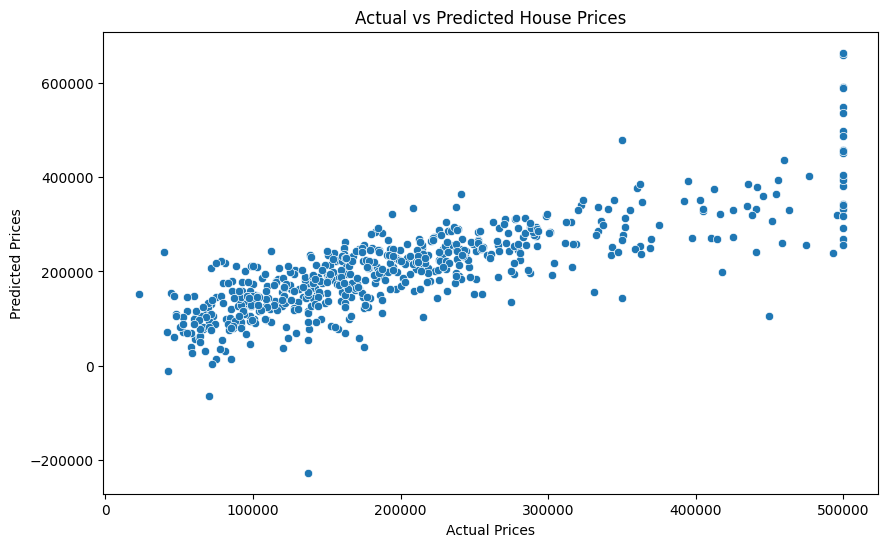

In [315]:
# Make predictions
y_pred = model_pipeline.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

# Plotting actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()


In [316]:
# Load the saved model
model_pipeline = joblib.load('linear_regression_model.pkl')

# Load the test data
test_data = pd.read_csv("C:/Users/Windows 10 Pro/Downloads/Compressed/archive_8/test_1.csv")

# Ensure test_data has the same columns as the training data
required_columns = model_pipeline.named_steps['preprocessor'].transformers_[0][2]

# Add missing columns to test_data with NaN values
for column in required_columns:
    if column not in test_data.columns:
        test_data[column] = np.nan

# Reorder columns to match the training data
test_data = test_data[required_columns]

# Make predictions on test data
try:
    test_data_processed = model_pipeline.named_steps['preprocessor'].transform(test_data)
    predictions = model_pipeline.named_steps['regressor'].predict(test_data_processed)
    print(predictions)
except Exception as e:
    print(f"An error occurred: {e}")

An error occurred: columns are missing: {'ocean_proximity'}
